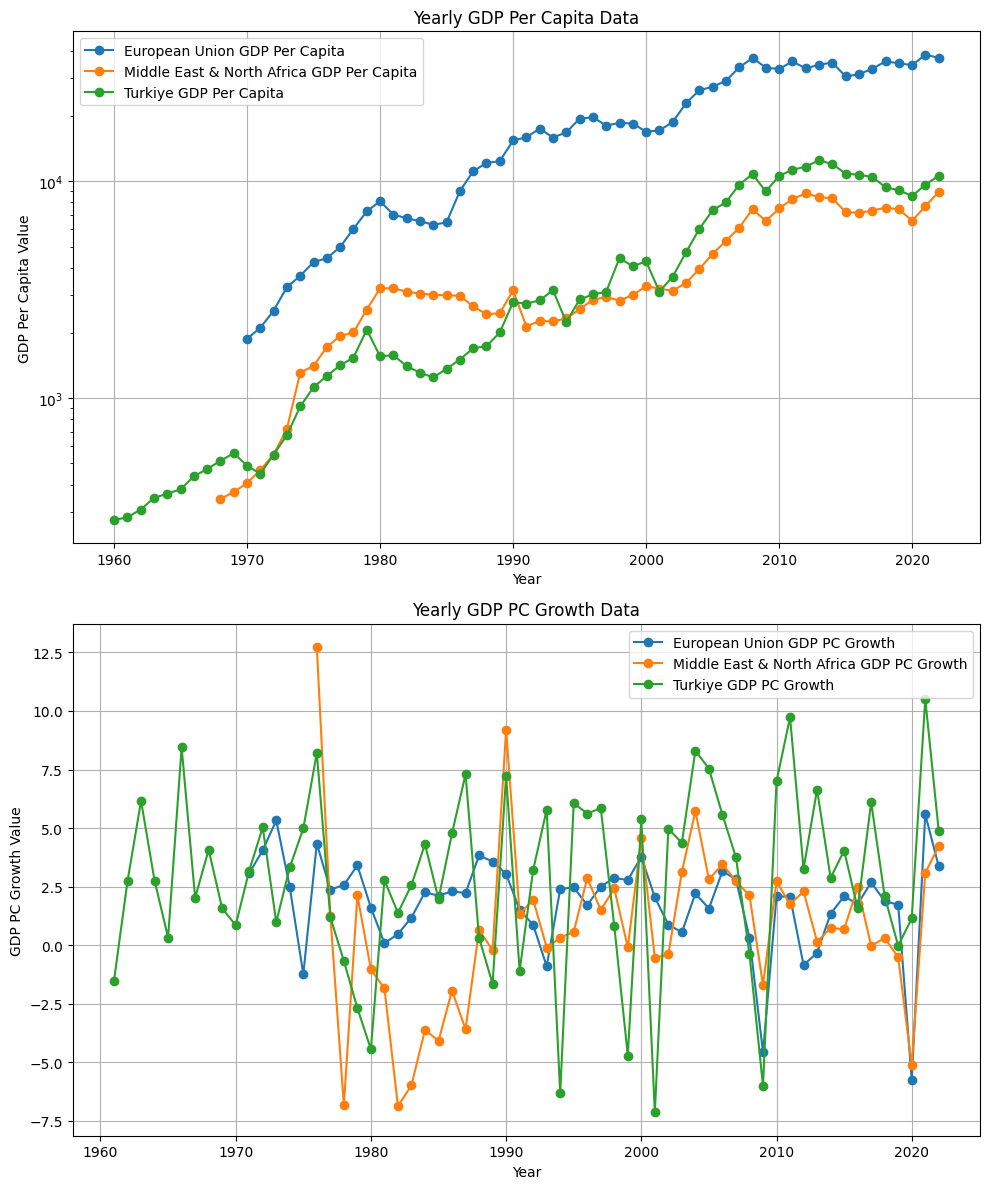

In [22]:
import psycopg2
import matplotlib.pyplot as plt

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="country_economics",
    user="postgres",
    password="3204965",
    host="localhost",
    port="5432"
)

# Create a cursor
cur = conn.cursor()

# Construct the list of year columns dynamically
year_columns = ",\n".join([f"year_{year}" for year in range(1960, 2023)])

# SQL query
sql_query = f"""
    SELECT
        gdp.country_name,
        {year_columns}
    FROM gdp_countries AS gdp
    WHERE country_name IN ('Turkiye', 'European Union',
      'Middle East & North Africa');
"""

# Fetch data from the gdp_countries table
cur.execute(sql_query)
gdp_data = cur.fetchall()

# Fetch data from the inflation table
inf_query = f"""
    SELECT
        inf.country_name,
        {year_columns}
    FROM gdp_per_capita_growth AS inf
    WHERE country_name IN ('Turkiye', 'European Union',
      'Middle East & North Africa');
"""

cur.execute(inf_query)
inf_data = cur.fetchall()

# Close the cursor and connection
cur.close()
conn.close()

years = list(range(1960, 2023))
gdp_values = []
gdp_countries = []
inf_values = []
inf_countries = []

for row in gdp_data:
    country_name = row[0]
    gdp_values.append(row[1:])
    gdp_countries.append(country_name)

for row in inf_data:
    country_name = row[0]
    inf_values.append(row[1:])
    inf_countries.append(country_name)

# Create a line plot
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot GDP data in the first subplot
for country, gdp in zip(gdp_countries, gdp_values):
    axes[0].plot(years, gdp, marker='o', label=f"{country} GDP Per Capita")

axes[0].set_title("Yearly GDP Per Capita Data")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("GDP Per Capita Value")
axes[0].set_yscale("log")
axes[0].grid(True)
axes[0].legend()

# Plot inflation data in the second subplot
for country, inf in zip(inf_countries, inf_values):
    axes[1].plot(years, inf, marker='o', label=f"{country} GDP PC Growth")

axes[1].set_title("Yearly GDP PC Growth Data")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("GDP PC Growth Value")
# axes[1].set_yscale("log")
axes[1].grid(True)
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

## Turkey's GDP & Inflation within its Region
When you look at the graphs, you can see the GDP per capita of Turkey and its surrounding regions. Note that the line graph is logarithmic which makes the small differences big for low income and and bi differences small for high income.  
I plot the graph logarithmically to see the trend of GDP per capita of Turkiye more clearly. 

Second graph shows the GDP per capita growth throughout the years from 1961 to 2022. In the graph, while the growth rate of Turkey and Middle East area changes dramatically, European Union's growth change is relatively stable. Besides, EU's GDP per capita growth trend becomes negative through the years much less when it is compared with Turkiye and MENA. 

_Note: Different recources provide changeable values for GPD per capita of Turkiye especially for the last years._

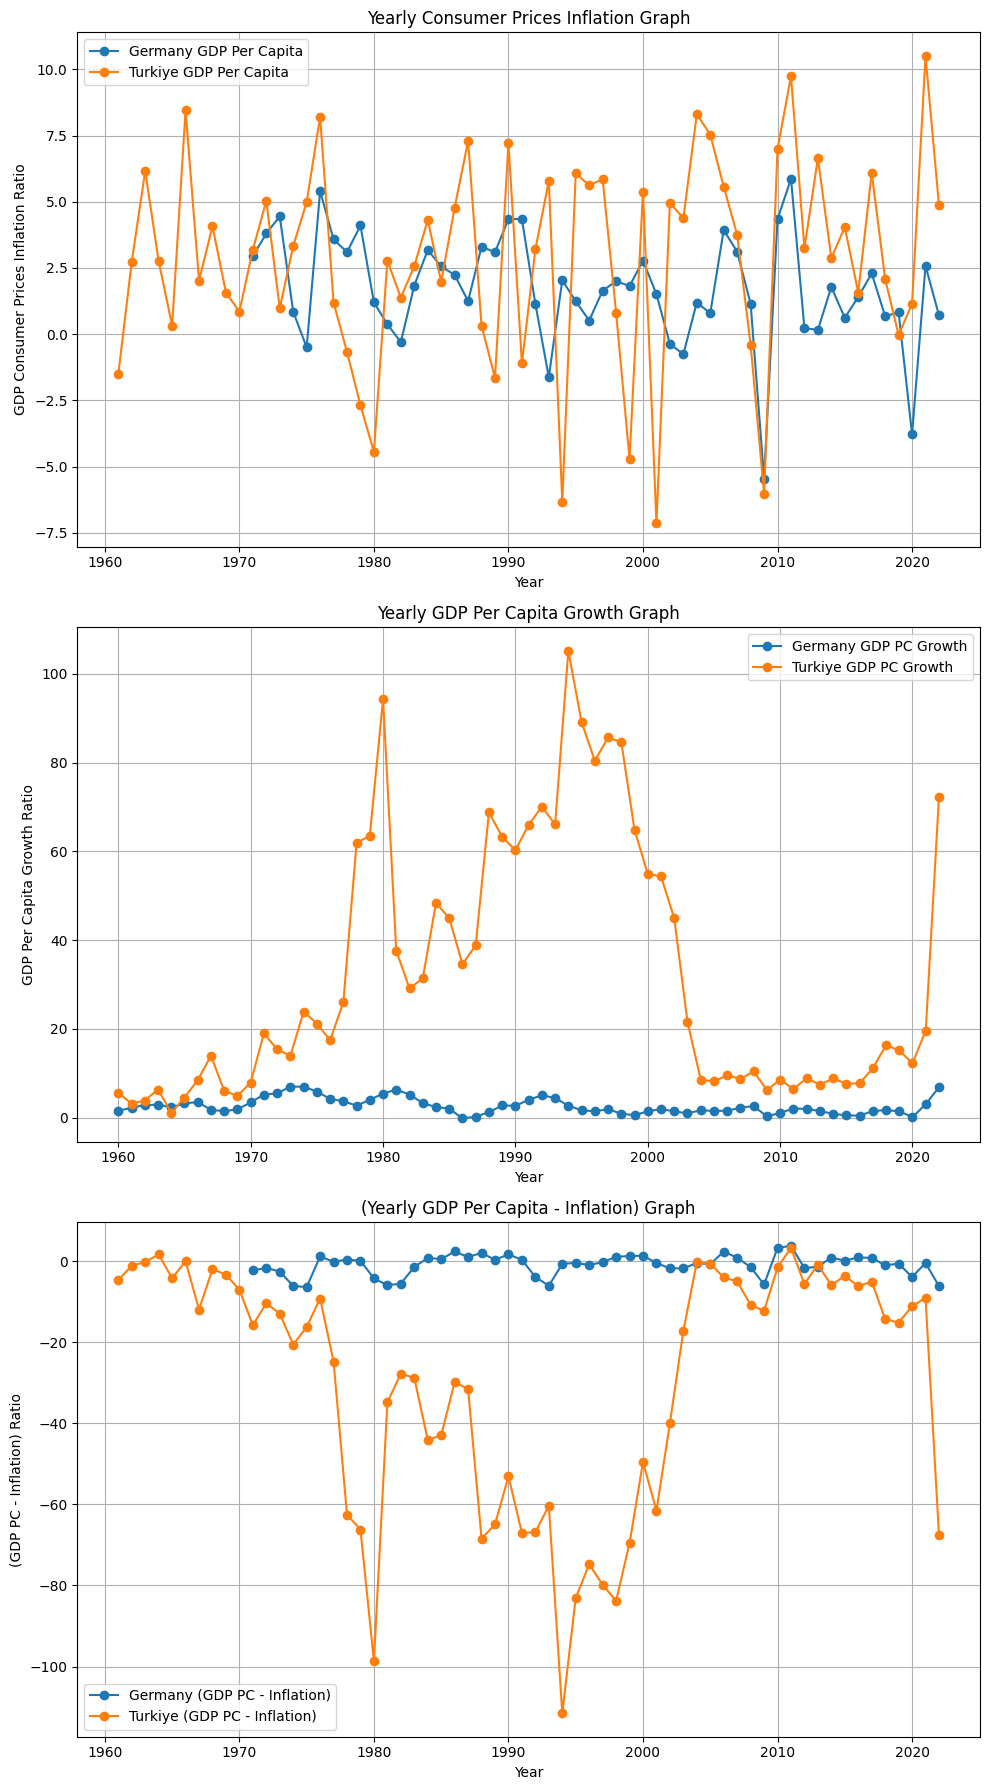

In [23]:
import psycopg2
import matplotlib.pyplot as plt

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="country_economics",
    user="postgres",
    password="3204965",
    host="localhost",
    port="5432"
)

# Create a cursor
cur = conn.cursor()

# Construct the list of year columns dynamically
year_columns = ",\n".join([f"year_{year}" for year in range(1960, 2023)])

# SQL query
inf_query = f"""
    SELECT
        country_name,
        {year_columns}
    FROM inflation_consumer
    WHERE country_name IN ('Turkiye', 'Germany');
"""

# Fetch data from the gdp_countries table
cur.execute(inf_query)
inf_data = cur.fetchall()

# Fetch data from the inflation table
gdp_query = f"""
    SELECT
        country_name,
        {year_columns}
    FROM gdp_per_capita_growth 
    WHERE country_name IN ('Turkiye', 'Germany');
"""

cur.execute(gdp_query)
gdp_data = cur.fetchall()

# Close the cursor and connection
cur.close()
conn.close()

years = list(range(1960, 2023))
gdp_values = []
gdp_countries = []
inf_values = []
inf_countries = []

for row in gdp_data:
    country_name = row[0]
    gdp_values.append(row[1:])
    gdp_countries.append(country_name)

for row in inf_data:
    country_name = row[0]
    inf_values.append(row[1:])
    inf_countries.append(country_name)

# Calculate the difference between GDP and inflation
diff_values = []

for gdp_row, inf_row in zip(gdp_values, inf_values):
    diff_row = []
    for gdp, inf in zip(gdp_row, inf_row):
        if gdp is not None and inf is not None:
            diff_row.append(gdp - inf)
        else:
            diff_row.append(None)
    diff_values.append(diff_row)


# Create a line plot
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot GDP data in the first subplot
for country, gdp in zip(gdp_countries, gdp_values):
    axes[0].plot(years, gdp, marker='o', label=f"{country} GDP Per Capita")

axes[0].set_title("Yearly Consumer Prices Inflation Graph")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("GDP Consumer Prices Inflation Ratio")
# axes[0].set_yscale("log")
axes[0].grid(True)
axes[0].legend()

# Plot inflation data in the second subplot
for country, inf in zip(inf_countries, inf_values):
    axes[1].plot(years, inf, marker='o', label=f"{country} GDP PC Growth")

axes[1].set_title("Yearly GDP Per Capita Growth Graph")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("GDP Per Capita Growth Ratio")
# axes[1].set_yscale("log")
axes[1].grid(True)
axes[1].legend()

for country, diff in zip(gdp_countries, diff_values):
    axes[2].plot(years, diff, marker='o', label=f"{country} (GDP PC - Inflation)")

    
axes[2].set_title("(Yearly GDP Per Capita - Inflation) Graph")
axes[2].set_xlabel("Year")
axes[2].set_ylabel("(GDP PC - Inflation) Ratio")
axes[2].grid(True)
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()

### (GDP Per Capita - Consumer Prices Inflation) Ratio
In above graphs, while the first one represents inflation with respect to consumer prices (average cost of a diverse range of goods and services that are commonly purchased by households within a country) in Turkiye and Germany, second graph plots GDP per capita growth (growth of average income of a citizen in a country) in each year. 
Third graph is the merge of both graphs by simply subtracting both of them from each other to see how citizen's income is protected against inflation. 

The main subject of these plots is to see Turkiye's stand against economically strong and stable country like Germany. When we focus on the third graph, we can see that the ideal condition is for the ratios to stay near zero or to have a positive value. The reason is neutral or positive value indicates that the average income of the citizens is either stable or increasing. 

In the current scenario, we see that ratios for Germany is often neutral or greater than zero. On the other hand, ratios of Turkiye changes dramatically through the years. Starting from middle of 70s, Turkiye suffers from high inflation that cannot be compensated by income growth. This trend continued until the beginning of 2000s by oscilating in highly negative values. Similar trend starts at the end of 2010s and peaks at 2022.

_Note: Above conclusion is just one of the indicators that give an idea of economical condition of countries. Therefore, it is not sufficient to draw a complete conclusion from those graphs without considering other aspects. Besides, the data taken from website of The World Bank may not be accurate completely._

### Score of Average Difference between GDP Growth & Consumer Price Inflation
Using the third graph in previous output, we can compute a score for each country that represents average difference between GDP growth and consumer price inflation. This score can be a simple indicator of a country on how well it keep GDP of citizens against inflation. 

The more (less negative) the score is the better a country handles GDP growth against inflation. Besides, a good score can indicate different aspects. Lets consider a good score. For a score to be good, inflation value can be low as well as GDP growth is relatively high to that value. On the other hand, inflation which degragates that score can be high as well as tremendous GDP growth. Another scenario can be negative inflation with neutral (0%) GDP growth. Ultimately, the score that is mentioned may result from different scenarios pointing to a single phenomenon: How well citizens' income is maintained by a country. 

In [26]:
import psycopg2

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="country_economics",
    user="postgres",
    password="3204965",
    host="localhost",
    port="5432"
)

# Create a cursor
cur = conn.cursor()

# Construct the list of year columns dynamically
year_columns = ",\n".join([f"year_{year}" for year in range(1960, 2022)])

# List of countries in your desired order
countries = ['Turkiye', 'Germany', 'Singapore']

# Create a dictionary to store country data
country_data = {}

# SQL queries for the selected countries
for country in countries:
    sql_query = f"""
        SELECT
            gdp.country_name,
            {year_columns}
        FROM inflation_consumer AS gdp
        WHERE country_name = '{country}';
    """
    cur.execute(sql_query)
    inf_row = cur.fetchone()

    inf_query = f"""
        SELECT
            inf.country_name,
            {year_columns}
        FROM gdp_per_capita_growth AS inf
        WHERE country_name = '{country}';
    """
    cur.execute(inf_query)
    gdp_row = cur.fetchone()

    # Store data in the dictionary
    country_data[country] = {'gdp': gdp_row[1:], 'inf': inf_row[1:]}

# Close the cursor and connection
cur.close()
conn.close()

# Calculate and print the average scores for each country
for country in countries:
    gdp_values = country_data[country]['gdp']
    inf_values = country_data[country]['inf']

    # Calculate the differences between GDP growth and inflation for each year
    diff_values = [gdp - inf if gdp is not None and inf is not None else None for gdp, inf in zip(gdp_values, inf_values)]

    # Calculate the average difference for the country
    filtered_diff = list(filter(None, diff_values))
    avg_score = sum(filtered_diff) / len(filtered_diff) if filtered_diff else None

    print(f"Average (GDP Growth - Inflation) Score for {country}: {round(avg_score, 2)}")

Average (GDP Growth - Inflation) Score for Turkiye: -29.02
Average (GDP Growth - Inflation) Score for Germany: -0.85
Average (GDP Growth - Inflation) Score for Singapore: 2.53


In this score computation, three countries which are Turkiye, Germany and Singapore is included to evaluate the data from different perpectives. As we stated earlier, greater value indicates that better purchasing power thorugh the years. 

Germany is picked for a purpose of having developed country in the list through all the years. When we seek Germany's GDP per capita and compare it with other countries for any year in the graph, we will see that Germany's value will be one of the highest. Singapore is selected because the country started with relatively low GDP (year_1960 = 428$) per capita and increased it throughout the years (year_2022 = 82807$) significantly. 

Different from other two countries, Turkiye encountered high-inflation periods multiple times in the lifespan of this dataset. Turkiye's score shows that the country couldn't manage to compensate the average income of citizens by increasing GDP per capita in somewhere in 1960 - 2022. Therefore, quality of citizens' life degraded due to decrement of their income. Especially the period in between 1977 - 2002 affects the score negatively because of high inflation. The period we mentioned has the weight of `25` (full weight = 62) with an average score of `-59.46`. If the period in between `1977 - 2002` is excluded, Turkiye's average score increases to `-7.00` from `-29.02`